# import library

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pickle

# import file menggunakan pandas

In [ ]:
df = pd.read_csv("/content/data.csv")
df.head()

,tiket _terjual,tingkat_rivalitas,suporter_lawan,suporter_team,keamanan
0,200,1,20,180,1
1,235,1,15,220,1
2,240,1,14,226,1
3,264,1,21,243,1
4,195,1,0,195,1


In [ ]:
df['keamanan'] = df['keamanan'].map({1:'biasa',2:'maksimal',3 :'super maksimal'})

In [ ]:
df.head()

,tiket _terjual,tingkat_rivalitas,suporter_lawan,suporter_team,keamanan
0,200,1,20,180,biasa
1,235,1,15,220,biasa
2,240,1,14,226,biasa
3,264,1,21,243,biasa
4,195,1,0,195,biasa


# labeling data x dan y 
##### x untuk feature dan y untuk label

In [ ]:
X = df.drop('keamanan',axis = 1)
Y = df['keamanan']

# split data
##### split data menjadi 70% latih dan 30% menjadi data test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=50)

# membuat model dengan menggunakan K Nearest Neigbors

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=3)
KNN = classifier.fit(X_train,y_train)

# klasifikias report untuk mengetahui precison, recal, accuracy, dan f1 

In [ ]:
y_pred = KNN.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred,))

                precision    recall  f1-score   support

         biasa       1.00      1.00      1.00         9
      maksimal       1.00      1.00      1.00         6
super maksimal       1.00      1.00      1.00         3

      accuracy                           1.00        18
     macro avg       1.00      1.00      1.00        18
  weighted avg       1.00      1.00      1.00        18



# visualisasi data confusion matrix

<function matplotlib.pyplot.show(*args, **kw)>

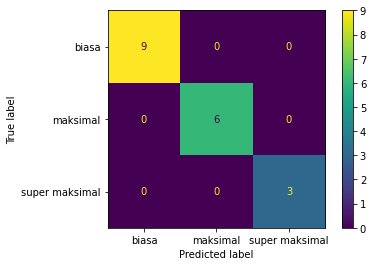

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show

# menyimpan model knn

In [ ]:
pickle.dump(classifier, open("model.pkl", "wb"))